<a href="https://colab.research.google.com/github/icollier77/oxfordAI/blob/main/Exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Exercise 2: Convolutional neural networks for handwritten digit recognition.

In [2]:
# Step 1: Load libraries.
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# Step 2: Load dataset.
mnist = tf.keras.datasets.mnist

In [4]:
(x_train,y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
# Example of a picture.

1


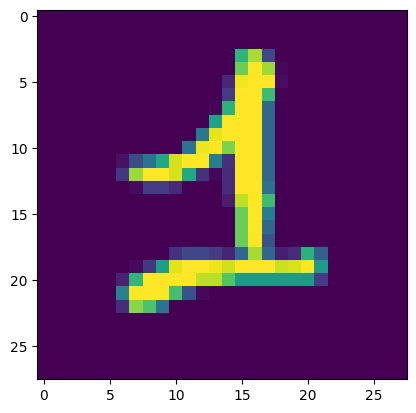

In [9]:
index = 24
plt.imshow(x_train[index])
print(y_train[index])

In [10]:
# Normalize the data
x_train = x_train.reshape(60000, 28, 28, 1)
x_train = x_train / 255.0
x_test = x_test.reshape(10000, 28, 28, 1)
x_test = x_test / 255.0

In [11]:
# Step 3: Build the model

In [14]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64,(3,3), activation=tf.nn.relu, input_shape=(28,28,1)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 84,106 (328.54 KB)

 Trainable params: 84,106 (328.54 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [18]:
# Step 4: Train the model

In [19]:
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 88s 46ms/step - accuracy: 0.8634 - loss: 0.4352
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 139s 45ms/step - accuracy: 0.9786 - loss: 0.0722
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 44ms/step - accuracy: 0.9853 - loss: 0.0458
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 44ms/step - accuracy: 0.9890 - loss: 0.0364
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.9922 - loss: 0.0255
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.9931 - loss: 0.0211
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.9941 - loss: 0.0180
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.9952 - loss: 0.0161
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 0.9953 - loss: 0.0135
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 45ms/step - accuracy: 0.9966 - loss: 0.0098


In [20]:
# Step 5: Evaluate model performance.

In [21]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9831 - loss: 0.0774


[0.05846773833036423, 0.9865000247955322]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
[9.9999994e-01 3.5344293e-12 3.8428083e-10 1.3557124e-11 3.9501141e-12
 9.0400437e-11 3.0488015e-10 4.9424607e-09 3.8810335e-12 1.6784641e-08]
0


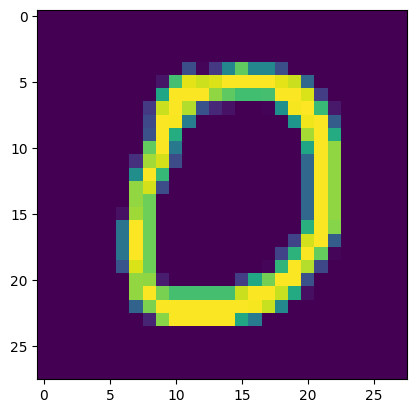

In [27]:
index = 10

classifications = model.predict(x_test)
print(classifications[index])

plt.imshow(x_test[index])
print(y_test[index])

dict_keys(['accuracy', 'loss'])


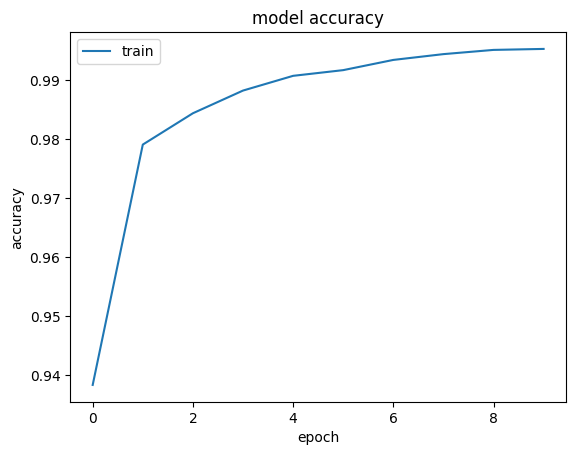

In [28]:
# PLOT THE TRAINING HISTORY

print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

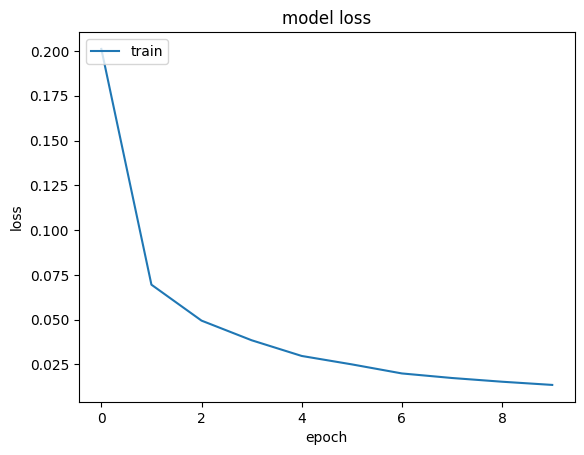

In [29]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()